# 项目0:预测泰坦尼克号的乘客生还率
## 了解数据

In [4]:
# 检查Py的版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception("请使用Python 2.7来完成此项目!")

In [5]:
import numpy as np
import pandas as pd

# 数据可视化
from titanic_visualizations import survival_stats
from IPython.display import display
%matplotlib inline

# 加载数据集
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# 显示数据列表中的前几项乘客数据
display(full_data.head())
# display(full_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 从数据集中移除 'Survived' 这个特征，并将它存储在一个新的变量中
outcomes = full_data['Survived']
data = full_data.drop('Survived',axis = 1)

# 显示已移除 'Survived' 特征的数据集
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 计算准确率

### 前五个的生还率

In [7]:
def accuracy_score(truth,pred):
    if len(truth) == len(pred):

        '''
        print 'truth : \n{truth}'.format(truth = truth)
        print 'pred : \n{pred}'.format(pred = pred)
        print (truth == pred).mean()
        '''
        
        return "Predictions have an accurace of {:.2f}%.".format((truth == pred).mean()*100)
    else:
        return "Number of predictions does not match number of outcomes!"
    
# 测试'accuracy_score'函数
# 假设全部存活,只预测前五个的准确率
predictions = pd.Series(np.ones(5,dtype = int))
print accuracy_score(outcomes[:5],predictions)

Predictions have an accurace of 60.00%.


### 所有人都无法生还>>5个人无法生还

In [8]:
def predictions_0(data):
    """ 不考虑任何特征，预测所有人都无法生还 """
    
    predictions = []
    for _,passenger in data.iterrows():
        predictions.append(0)
    # predictions = predictions[:5]
    return pd.Series(predictions)

# 进行预测
predictions = predictions_0(data)
# print 'predictions : {pre}'.format(pre = pd.Series(predictions))
# print accuracy_score(outcomes[:5],predictions[:5])
print accuracy_score(outcomes,predictions)

Predictions have an accurace of 61.62%.


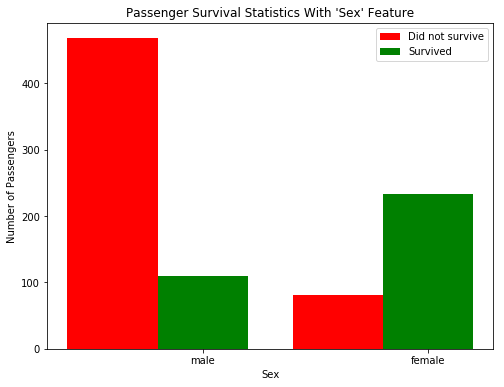

In [9]:
survival_stats(data,outcomes,'Sex')

### 女生为特征,生还率

In [10]:
test = []
for _,passenger in data.iterrows():
    
    if passenger['Sex'] == 'female':
        test.append(1)
    else:
        test.append(0)
print pd.Series(test)

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Length: 891, dtype: int64


In [11]:
def predictions_1(data):
    """ 只考虑一个特征，如果是女性则生还 """
    
    predictions = []
    for _,passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)   
    # print pd.Series(predictions)
    return pd.Series(predictions)

predictions = predictions_1(data)
# print predictions
print accuracy_score(outcomes,predictions)

Predictions have an accurace of 78.68%.


### 两个特征进行预测

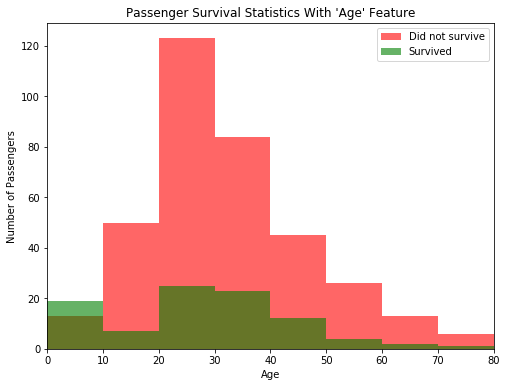

In [12]:
survival_stats(data,outcomes,'Age',['Sex == "male"' ])
# survival_stats(data,outcomes,'Sex',['Age < 18' ])

In [13]:
def predictions_2(data):
    '''
    考虑两个特征: 
            - 如果是女性则生还
            - 如果是男性并且小于10岁则生还
    '''
    predictions = []
    for _,passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        elif passenger['Age'] <= 10:
            predictions.append(1)
        else:
            predictions.append(0)
            
    # print pd.Series(predictions)       
    return pd.Series(predictions)

predictions = predictions_2(data)
# print predictions
print accuracy_score(outcomes,predictions)


Predictions have an accurace of 79.24%.


### 自己的预测模型

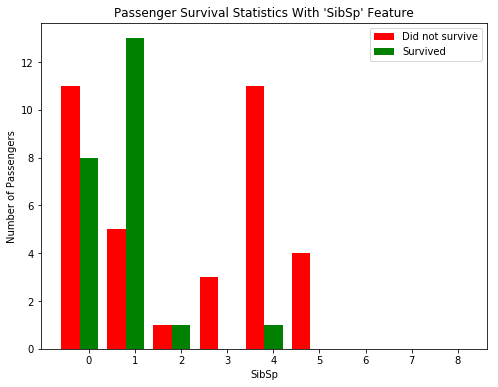

In [16]:
survival_stats(data, outcomes, 'SibSp', ["Sex == 'male'","Age < 18"])

In [17]:
def predictions_3(data):
    """ 考虑多个特征，准确率至少达到80% """
    """
        1.女性全部生还
        2.小于18岁的男孩全部生还
        3.阶级等级为1,2的,小于18的男性全部生还
    """
    
    predictions = []
    for _,passenger in data.iterrows():
        
        if passenger['Sex'] == 'female' or passenger['Age'] <= 10:
            predictions.append(1)
        # elif passenger['Age'] <= 20:
            # predictions.append(1)
        elif passenger['Pclass'] == 1 and passenger['Pclass'] == 2:
        # elif passenger['SibSp'] == 0:
            predictions.append(1)
        else:
            predictions.append(0)
    
    return pd.Series(predictions)

predictions = predictions_3(data)
print accuracy_score(outcomes,predictions)

Predictions have an accurace of 79.24%.


**回答**: *高性能主机的价格,特征:cpu/显卡/内存/主板;上课迟到率,特征:上课是上午还是下午,老师讲的是否有趣,报名人数多不多*